# Analysis of Real-World Data from a Solar-Equipped Smart Home

## Notebook 2: Calculations (Correlations + Weather + Heating)


## Overview:
- ``Data source``: 
    - CSV-files  smart home system from my friend "Jürgen"

- ``Main target / tasks ()``:
    - Analyze energy + heating KPI's and give advises for stakeholder for savings

- ``Hypotheses``:
    1. Heating Usage: Heating is used even when outdoor temperature exceeds 15°C
    2. Solar energy: Season/month has greater impact on PV generation than weather conditions
    3. Energy Independence: Self-sufficiency is only achieved in Q2 and Q3
    4. Payback Period: Even under best conditions, the system amortization time can only be reduced by 1 year    compared to current conditions
    
    
    
    

## Main results:
- ``Hypothesis``: 
    1. Heating optimization offers limited savings
    2. Seasonal > weather influences on solar energy
    3. Self-sufficiency achievable in all seasons
    4. Amortization time highly driven by import costs
    
    
- ``Stakeholder recommendations``: 
    1. Monitor heating patterns during spring / fall
    2. Implement data validation checks [NaN values]
    3. Evaluate electricity contracts regularly to reduce yearly costs for import
    

## Install packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from pathlib import Path
import re

: 

## 6.) Correlations: Energy + weather data

### Import aggregated energy data 
- Source: CSV-file that was created in "notebook 1"

In [ ]:
values_per_day = pd.read_csv("data/Python_aggregations/Aggregation_A-Energy_Daily__(2025-10-28).csv")

values_per_day.head()

: 

### Merge weather data <=> smart home data + cleaning

- Source: Open Meteo API
- File used for download:  "Open_meteo_Eschborn_daily_ETL_classifikation.py"
- Infos about data: https://open-meteo.com/en/docs#weathervariables

In [ ]:
weather = pd.read_csv("data/Weather/eschborn_daily_weather_20240301-20250930.csv")

weather.head()

,date,temperature_2m_max,temperature_2m_mean,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration,daylight_duration,cloudcover_mean,wind_speed_10m_max,weathercode,weathercode_text,sunshine_hours,daylight_hours,precip_category,weather_type,is_dry_day
0,2024-03-01,9.8,4.8,0.2,0.0,0.0,15894.41,39588.64,79,15.3,3,bedeckt,4.415114,10.996844,none,cloudy,True
1,2024-03-02,12.3,7.2,4.2,0.0,0.0,25534.84,39815.23,80,9.4,3,bedeckt,7.093011,11.059786,none,cloudy,True
2,2024-03-03,14.9,8.3,3.0,0.0,0.0,34793.37,40042.31,66,12.2,3,bedeckt,9.664825,11.122864,none,partly_cloudy,True
3,2024-03-04,10.4,7.7,5.5,0.0,0.0,2958.55,40269.70,90,18.8,3,bedeckt,0.821819,11.186028,none,cloudy,True
4,2024-03-05,8.6,6.3,2.7,1.6,9.0,0.00,40497.24,83,9.5,53,"Niesel, mäßig",0.000000,11.249233,light,drizzle,False


In [ ]:
weather["date"] = pd.to_datetime(weather["date"])  

weather.head()

,date,temperature_2m_max,temperature_2m_mean,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration,daylight_duration,cloudcover_mean,wind_speed_10m_max,weathercode,weathercode_text,sunshine_hours,daylight_hours,precip_category,weather_type,is_dry_day
0,2024-03-01,9.8,4.8,0.2,0.0,0.0,15894.41,39588.64,79,15.3,3,bedeckt,4.415114,10.996844,none,cloudy,True
1,2024-03-02,12.3,7.2,4.2,0.0,0.0,25534.84,39815.23,80,9.4,3,bedeckt,7.093011,11.059786,none,cloudy,True
2,2024-03-03,14.9,8.3,3.0,0.0,0.0,34793.37,40042.31,66,12.2,3,bedeckt,9.664825,11.122864,none,partly_cloudy,True
3,2024-03-04,10.4,7.7,5.5,0.0,0.0,2958.55,40269.70,90,18.8,3,bedeckt,0.821819,11.186028,none,cloudy,True
4,2024-03-05,8.6,6.3,2.7,1.6,9.0,0.00,40497.24,83,9.5,53,"Niesel, mäßig",0.000000,11.249233,light,drizzle,False


In [ ]:
# Translate "weather_type" (string) into numbers 1 - 6

# Define mapping dictionary
weather_mapping = {
    'sunny': 1,
    'partly_cloudy': 2,
    'cloudy': 3,
    'drizzle': 4,
    'rainy': 5,
    'snow': 6
}

# Apply the mapping
weather['weather_type_num'] = weather['weather_type'].map(weather_mapping)

weather.head()

,date,temperature_2m_max,temperature_2m_mean,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration,daylight_duration,cloudcover_mean,wind_speed_10m_max,weathercode,weathercode_text,sunshine_hours,daylight_hours,precip_category,weather_type,is_dry_day,weather_type_num
0,2024-03-01,9.8,4.8,0.2,0.0,0.0,15894.41,39588.64,79,15.3,3,bedeckt,4.415114,10.996844,none,cloudy,True,3
1,2024-03-02,12.3,7.2,4.2,0.0,0.0,25534.84,39815.23,80,9.4,3,bedeckt,7.093011,11.059786,none,cloudy,True,3
2,2024-03-03,14.9,8.3,3.0,0.0,0.0,34793.37,40042.31,66,12.2,3,bedeckt,9.664825,11.122864,none,partly_cloudy,True,2
3,2024-03-04,10.4,7.7,5.5,0.0,0.0,2958.55,40269.70,90,18.8,3,bedeckt,0.821819,11.186028,none,cloudy,True,3
4,2024-03-05,8.6,6.3,2.7,1.6,9.0,0.00,40497.24,83,9.5,53,"Niesel, mäßig",0.000000,11.249233,light,drizzle,False,4


In [ ]:
pv_gen = values_per_day[["pv-generation"]]
pv_gen.head(2)

,pv-generation
date,
2024-03-01,0.0
2024-03-02,11.8


In [ ]:
# Merge house data <=> weather data
house_weather = pv_gen.merge(weather, how="inner", on="date")

house_weather.head()

,date,pv-generation,temperature_2m_max,temperature_2m_mean,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration,daylight_duration,cloudcover_mean,wind_speed_10m_max,weathercode,weathercode_text,sunshine_hours,daylight_hours,precip_category,weather_type,is_dry_day,weather_type_num
0,2024-03-01,0.0,9.8,4.8,0.2,0.0,0.0,15894.41,39588.64,79,15.3,3,bedeckt,4.415114,10.996844,none,cloudy,True,3
1,2024-03-02,11.8,12.3,7.2,4.2,0.0,0.0,25534.84,39815.23,80,9.4,3,bedeckt,7.093011,11.059786,none,cloudy,True,3
2,2024-03-03,21.6,14.9,8.3,3.0,0.0,0.0,34793.37,40042.31,66,12.2,3,bedeckt,9.664825,11.122864,none,partly_cloudy,True,2
3,2024-03-04,3.5,10.4,7.7,5.5,0.0,0.0,2958.55,40269.70,90,18.8,3,bedeckt,0.821819,11.186028,none,cloudy,True,3
4,2024-03-05,2.7,8.6,6.3,2.7,1.6,9.0,0.00,40497.24,83,9.5,53,"Niesel, mäßig",0.000000,11.249233,light,drizzle,False,4


In [ ]:
# Drop columns that are useless for correlation:
house_weather = house_weather.drop(["sunshine_duration", "weathercode"], 
                                    axis = 1)

### Correlation matrix

#### 1.) All columns from "values per day" + weather

In [ ]:
# All columns from 
house_weather_ALL = values_per_day.drop('date', axis = 1).merge(weather, how="inner", on="date")

house_weather_ALL

,date,pv-generation,consumed-energy,battery-charge,battery-discharge,imported-energy,exported-energy,month,quarter,year,...,cloudcover_mean,wind_speed_10m_max,weathercode,weathercode_text,sunshine_hours,daylight_hours,precip_category,weather_type,is_dry_day,weather_type_num
0,2024-03-01,0.0,0.0,0.0,6.6,0.0,0.0,3,1,2024,...,79,15.3,3,bedeckt,4.415114,10.996844,none,cloudy,True,3
1,2024-03-02,11.8,7.0,6.9,2.3,3.0,2.9,3,1,2024,...,80,9.4,3,bedeckt,7.093011,11.059786,none,cloudy,True,3
2,2024-03-03,21.6,10.0,6.4,6.8,0.0,12.3,3,1,2024,...,66,12.2,3,bedeckt,9.664825,11.122864,none,partly_cloudy,True,2
3,2024-03-04,3.5,9.0,1.6,4.0,0.0,0.2,3,1,2024,...,90,18.8,3,bedeckt,0.821819,11.186028,none,cloudy,True,3
4,2024-03-05,2.7,10.0,1.1,0.6,7.8,0.1,3,1,2024,...,83,9.5,53,"Niesel, mäßig",0.000000,11.249233,light,drizzle,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2025-09-26,10.6,7.0,5.3,2.8,2.1,2.8,9,3,2025,...,92,13.0,55,"Niesel, stark",5.665000,11.945131,moderate,drizzle,False,4
575,2025-09-27,9.3,12.0,6.5,8.0,0.8,0.6,9,3,2025,...,70,7.6,51,"Niesel, leicht",7.492092,11.883139,light,drizzle,False,4
576,2025-09-28,11.8,8.0,6.2,3.7,2.0,2.9,9,3,2025,...,45,8.1,51,"Niesel, leicht",8.345397,11.820953,light,drizzle,False,4
577,2025-09-29,11.8,11.0,6.4,8.3,0.2,2.9,9,3,2025,...,58,7.4,51,"Niesel, leicht",10.527550,11.758611,light,drizzle,False,4


In [ ]:
# Correlation matrix for merged data set
corr_matrix_ALL = house_weather_ALL.corr(numeric_only=True)

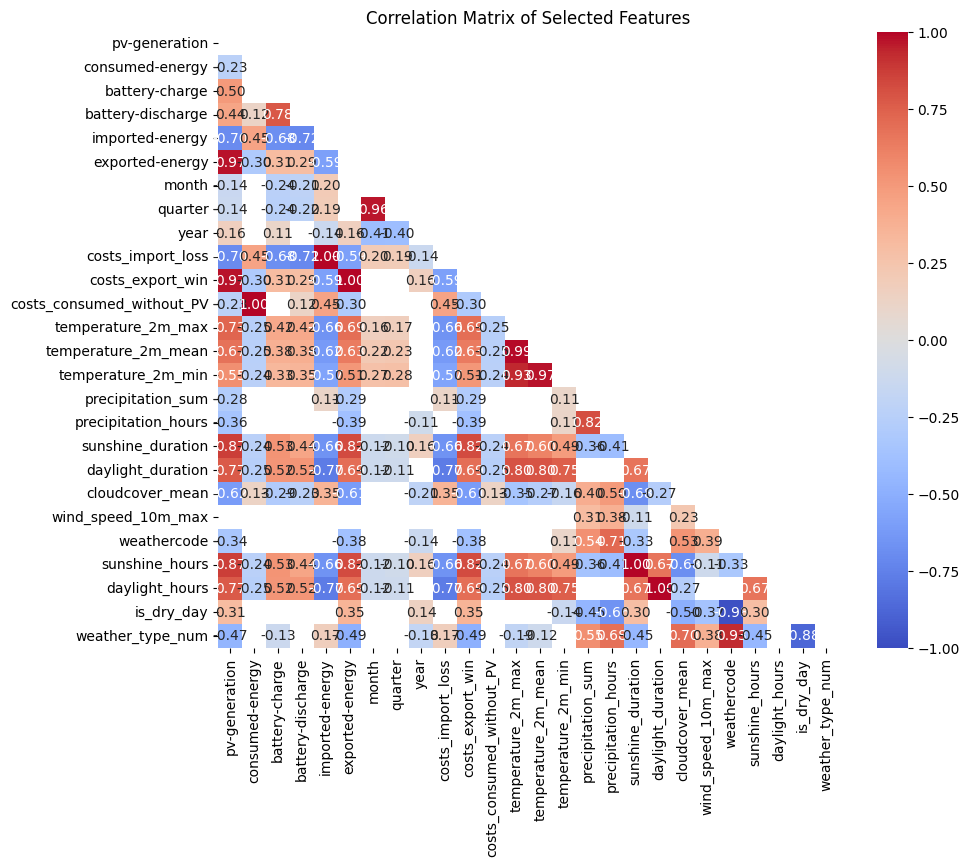

In [ ]:
# Combined mask (no upper triangle + no "weak" correlations)
mask_upper_all = np.triu(np.ones_like(corr_matrix_ALL, dtype=bool))       # Mask 1: hide upper triagle of matrix
mask_weak_all = (corr_matrix_ALL > -0.1) & (corr_matrix_ALL < 0.1)          # Mask 2: hide weak correlations
mask = mask_upper_all  | mask_weak_all                                      # Combined mask

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ALL, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()


#### 2.) Only interesting columns (PV-generation + weather_best-correlations)

In [ ]:
# Correlation matrix for merged data set
corr_matrix = house_weather.corr(numeric_only=True)

In [ ]:
# Get correlation values of all columns with the target column "pv-generation"
target = "pv-generation"
corr_with_target = corr_matrix[target].sort_values(ascending=False).round(2)

# threshold-based filtering
interesting_corr = corr_with_target[abs(corr_with_target) > 0.3]

print(interesting_corr)
# print(corr_with_target)

pv-generation          1.00
sunshine_hours         0.87
daylight_duration      0.77
daylight_hours         0.77
temperature_2m_max     0.73
temperature_2m_mean    0.67
temperature_2m_min     0.55
is_dry_day             0.31
precipitation_hours   -0.36
weather_type_num      -0.47
cloudcover_mean       -0.62
Name: pv-generation, dtype: float64


In [ ]:
# List with interesting columns
interesting_cols = interesting_corr.index.tolist()
    # print("Columns most correlated with pv-generation:", interesting_cols)

# Filtered dataframe for correlations:
filtered_corr = corr_matrix.loc[interesting_cols, interesting_cols]
filtered_corr

,pv-generation,sunshine_hours,daylight_duration,daylight_hours,temperature_2m_max,temperature_2m_mean,temperature_2m_min,is_dry_day,precipitation_hours,weather_type_num,cloudcover_mean
pv-generation,1.000000,0.868029,0.770428,0.770428,0.733193,0.673530,0.550820,0.311083,-0.358740,-0.466265,-0.616781
sunshine_hours,0.868029,1.000000,0.668010,0.668010,0.667242,0.602392,0.486671,0.296032,-0.406798,-0.449195,-0.684915
daylight_duration,0.770428,0.668010,1.000000,1.000000,0.798502,0.796774,0.750688,-0.067269,0.048891,-0.080902,-0.269166
daylight_hours,0.770428,0.668010,1.000000,1.000000,0.798502,0.796774,0.750688,-0.067269,0.048891,-0.080902,-0.269166
temperature_2m_max,0.733193,0.667242,0.798502,0.798502,1.000000,0.986880,0.934807,0.029691,-0.067563,-0.193109,-0.346214
temperature_2m_mean,0.673530,0.602392,0.796774,0.796774,0.986880,1.000000,0.974272,-0.042430,0.006717,-0.116412,-0.273190
temperature_2m_min,0.550820,0.486671,0.750688,0.750688,0.934807,0.974272,1.000000,-0.140769,0.112829,-0.007952,-0.163839
is_dry_day,0.311083,0.296032,-0.067269,-0.067269,0.029691,-0.042430,-0.140769,1.000000,-0.662396,-0.879110,-0.501263
precipitation_hours,-0.358740,-0.406798,0.048891,0.048891,-0.067563,0.006717,0.112829,-0.662396,1.000000,0.680749,0.499481
weather_type_num,-0.466265,-0.449195,-0.080902,-0.080902,-0.193109,-0.116412,-0.007952,-0.879110,0.680749,1.000000,0.701436


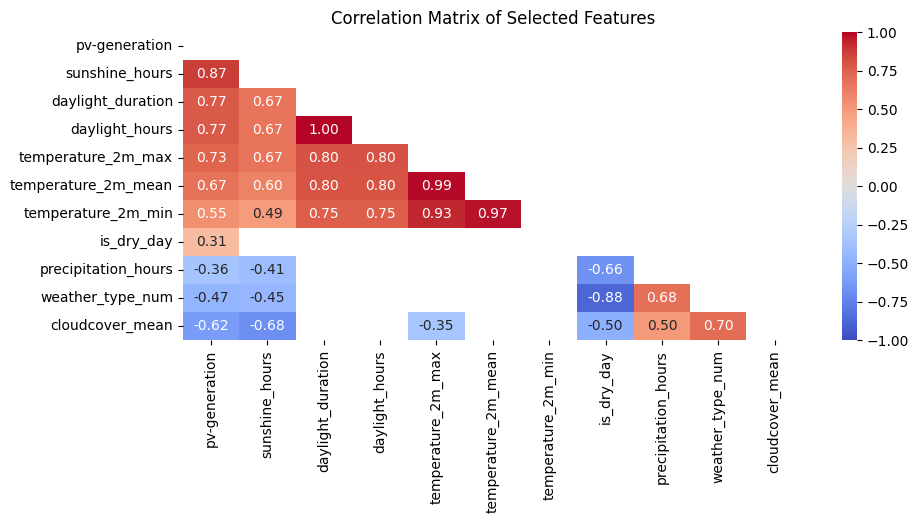

In [ ]:
# Combined mask (no upper triangle + no "weak" correlations)
mask_upper = np.triu(np.ones_like(filtered_corr, dtype=bool))       # Mask 1: hide upper triagle of matrix
mask_weak = (filtered_corr > -0.3) & (filtered_corr < 0.3)          # Mask 2: hide weak correlations
mask = mask_upper  | mask_weak                                      # Combined mask

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()


#### 3.) Only PV-generation + sunshine + daylight

In [ ]:
only_pv_sun = house_weather[['pv-generation', 'sunshine_hours', 'daylight_duration']]

only_pv_sun = only_pv_sun.rename(columns={
                                    'pv-generation': 'solar_kWh',
                                    'sunshine_hours': 'sunshine_h',
                                    'daylight_duration': 'daylight_h'})

corr_matrix_pv_sun = only_pv_sun.corr(numeric_only=True)

corr_matrix_pv_sun

,solar_kWh,sunshine_h,daylight_h
solar_kWh,1.000000,0.868029,0.770428
sunshine_h,0.868029,1.000000,0.668010
daylight_h,0.770428,0.668010,1.000000


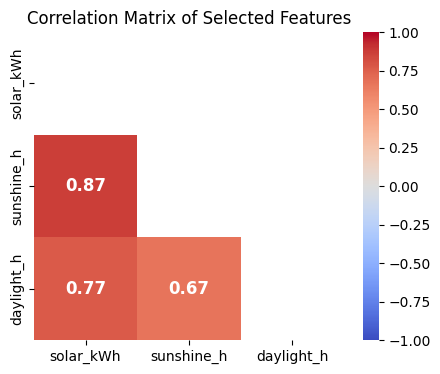

In [ ]:
# Combined mask (no upper triangle + no "weak" correlations)
mask = np.triu(np.ones_like(corr_matrix_pv_sun, dtype=bool))       # Mask: hide upper triagle of matrix


# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_pv_sun, cmap='coolwarm', mask=mask, 
             vmin=-1, vmax=1,
             annot=True, fmt=".2f",  annot_kws={"size": 12, "weight": "bold"})  #  annotations
plt.title('Correlation Matrix of Selected Features')
plt.show()


#### 3.) Only PV-generation + weather type (sunny -> cloud / rain) + Cloudcover (mean % per day)

In [ ]:
only_pv_weather = house_weather[['pv-generation', 'weather_type_num', 'cloudcover_mean']]

only_pv_weather = only_pv_weather.rename(columns={
                                    'pv-generation': 'solar_kWh',
                                    'weather_type_num': 'weather_type',
                                    'cloudcover_mean': 'cloudcover_%'})

corr_matrix_pv_weather = only_pv_weather.corr(numeric_only=True)

corr_matrix_pv_weather

,solar_kWh,weather_type,cloudcover_%
solar_kWh,1.000000,-0.466265,-0.616781
weather_type,-0.466265,1.000000,0.701436
cloudcover_%,-0.616781,0.701436,1.000000


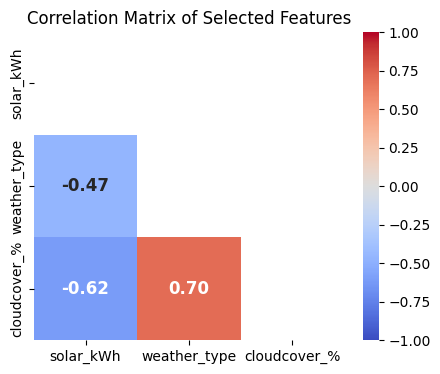

In [ ]:
# Combined mask (no upper triangle + no "weak" correlations)
mask = np.triu(np.ones_like(corr_matrix_pv_weather, dtype=bool))       # Mask: hide upper triagle of matrix


# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_pv_weather, cmap='coolwarm', mask=mask, 
             vmin=-1, vmax=1,
             annot=True, fmt=".2f",  annot_kws={"size": 12, "weight": "bold"})  #  annotations
plt.title('Correlation Matrix of Selected Features')
plt.show()


## 7.) Autarky - Self-sufficiency
Autarkie [%] = (1 - (Import + Batterieverluste) / Verbrauch)


In [ ]:
# self-sufficiency per row
autarky_per_row = (1 - 
        (values_per_day["imported-energy"] 
            + values_per_day["battery-charge"] 
            - values_per_day["battery-discharge"])
        / values_per_day["consumed-energy"])
autarky_per_row.head()

date
2024-03-01         inf
2024-03-02   -0.085714
2024-03-03    1.040000
2024-03-04    1.266667
2024-03-05    0.170000
dtype: float64

In [ ]:
#  Function to calculate "Autarky" = self_sufficiency

def calc_self_sufficiency_sum(df_slice: pd.DataFrame) -> float:
    """
    Calculate total self-sufficiency ratio for a given time slice,
    using aggregated sums across the entire period.
    Formula:
        1 - ((Σ imported + Σ charge - Σ discharge) / Σ consumed)
    """
    # Compute aggregated sums for each energy type
    imported_sum = df_slice["imported-energy"].sum(skipna=True)
    charge_sum = df_slice["battery-charge"].sum(skipna=True)
    discharge_sum = df_slice["battery-discharge"].sum(skipna=True)
    consumed_sum = df_slice["consumed-energy"].sum(skipna=True)
    
    # Avoid division by zero
    if consumed_sum == 0:
        return np.nan
    
    # Apply the formula using aggregated totals
    result = 1 - ((imported_sum + charge_sum - discharge_sum) / consumed_sum)
    return result.round(2)


In [ ]:
# Define time windows (in days)
windows = {
    "last_7d": 7,
    "last_30d": 30,
    "last_365d": 365,
}

results = {}

# Ensure index is datetime
values_per_day.index = pd.to_datetime(values_per_day.index)

# Loop through all windows
for name, days in windows.items():
    # Define time range
    end_date = values_per_day.index.max()  # use latest available date in data
    start_date = end_date - pd.Timedelta(days=days)
    
    # Filter by date range using .loc
    df_win = values_per_day.loc[start_date:end_date]
    
    # Compute total self-sufficiency for that period
    results[name] = calc_self_sufficiency_sum(df_win)

print(results)


{'last_7d': np.float64(0.66), 'last_30d': np.float64(0.82), 'last_365d': np.float64(0.62)}


# 8.) Heating evaluation

In [ ]:
df_heating = pd.read_csv("data/C_Heating/C_Heizung-Energie_01-data_2024-03_2025-09_heating-gas-consumption-current-day_600s_m3.csv")

df_heating

,time,m³.mean_value
0,2024-03-01T00:00:00.000+01:00,NaN
1,2024-03-01T00:10:00.000+01:00,NaN
2,2024-03-01T00:20:00.000+01:00,NaN
3,2024-03-01T00:30:00.000+01:00,0.1
4,2024-03-01T00:40:00.000+01:00,NaN
...,...,...
83365,2025-09-30T23:10:00.000+02:00,3.6
83366,2025-09-30T23:20:00.000+02:00,NaN
83367,2025-09-30T23:30:00.000+02:00,NaN
83368,2025-09-30T23:40:00.000+02:00,NaN


In [ ]:
# Create date column for aggregation
df_heating["time"] = pd.to_datetime(df_heating["time"], errors="coerce", utc=True)
df_heating["date"] = pd.to_datetime(df_heating["time"]).dt.date
df_heating

,time,m³.mean_value,date
0,2024-02-29 23:00:00+00:00,NaN,2024-02-29
1,2024-02-29 23:10:00+00:00,NaN,2024-02-29
2,2024-02-29 23:20:00+00:00,NaN,2024-02-29
3,2024-02-29 23:30:00+00:00,0.1,2024-02-29
4,2024-02-29 23:40:00+00:00,NaN,2024-02-29
...,...,...,...
83365,2025-09-30 21:10:00+00:00,3.6,2025-09-30
83366,2025-09-30 21:20:00+00:00,NaN,2025-09-30
83367,2025-09-30 21:30:00+00:00,NaN,2025-09-30
83368,2025-09-30 21:40:00+00:00,NaN,2025-09-30


In [ ]:
# Heating values per day (max value)
heating_per_day = df_heating.groupby('date').max().round(2)
heating_per_day.drop(columns=['time'], inplace=True)

heating_per_day.rename(columns={'m³.mean_value': 'heating-water_m3'}, inplace=True)

heating_per_day.head()

,heating-water_m3
date,
2024-02-29,0.1
2024-03-01,8.9
2024-03-02,7.8
2024-03-03,7.2
2024-03-04,6.5


In [ ]:
# Convert index to "date time"
heating_per_day.index = pd.to_datetime(heating_per_day.index)
print(heating_per_day.index.dtype)

datetime64[ns]


In [ ]:
# Merge heating data <=> weather data
heating_weather = heating_per_day.merge(weather, how="inner", on="date")

heating_weather.head()

,date,heating-water_m3,temperature_2m_max,temperature_2m_mean,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration,daylight_duration,cloudcover_mean,wind_speed_10m_max,weathercode,weathercode_text,sunshine_hours,daylight_hours,precip_category,weather_type,is_dry_day,weather_type_num
0,2024-03-01,8.9,9.8,4.8,0.2,0.0,0.0,15894.41,39588.64,79,15.3,3,bedeckt,4.415114,10.996844,none,cloudy,True,3
1,2024-03-02,7.8,12.3,7.2,4.2,0.0,0.0,25534.84,39815.23,80,9.4,3,bedeckt,7.093011,11.059786,none,cloudy,True,3
2,2024-03-03,7.2,14.9,8.3,3.0,0.0,0.0,34793.37,40042.31,66,12.2,3,bedeckt,9.664825,11.122864,none,partly_cloudy,True,2
3,2024-03-04,6.5,10.4,7.7,5.5,0.0,0.0,2958.55,40269.70,90,18.8,3,bedeckt,0.821819,11.186028,none,cloudy,True,3
4,2024-03-05,6.9,8.6,6.3,2.7,1.6,9.0,0.00,40497.24,83,9.5,53,"Niesel, mäßig",0.000000,11.249233,light,drizzle,False,4


In [ ]:
# Condition columns for Temp_min >= 10°C and Temp_mean >= 15°C
heating_weather['temp_min_above_10']    = heating_weather['temperature_2m_min'] > 10
heating_weather['temp_mean_above_15']   = heating_weather['temperature_2m_mean'] > 15
heating_weather['heating_used']         = heating_weather['heating-water_m3'] > 0.1  

heating_weather.head()

,date,heating-water_m3,temperature_2m_max,temperature_2m_mean,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration,daylight_duration,cloudcover_mean,...,weathercode_text,sunshine_hours,daylight_hours,precip_category,weather_type,is_dry_day,weather_type_num,temp_min_above_10,temp_mean_above_15,heating_used
0,2024-03-01,8.9,9.8,4.8,0.2,0.0,0.0,15894.41,39588.64,79,...,bedeckt,4.415114,10.996844,none,cloudy,True,3,False,False,True
1,2024-03-02,7.8,12.3,7.2,4.2,0.0,0.0,25534.84,39815.23,80,...,bedeckt,7.093011,11.059786,none,cloudy,True,3,False,False,True
2,2024-03-03,7.2,14.9,8.3,3.0,0.0,0.0,34793.37,40042.31,66,...,bedeckt,9.664825,11.122864,none,partly_cloudy,True,2,False,False,True
3,2024-03-04,6.5,10.4,7.7,5.5,0.0,0.0,2958.55,40269.70,90,...,bedeckt,0.821819,11.186028,none,cloudy,True,3,False,False,True
4,2024-03-05,6.9,8.6,6.3,2.7,1.6,9.0,0.00,40497.24,83,...,"Niesel, mäßig",0.000000,11.249233,light,drizzle,False,4,False,False,True


In [ ]:
# Conditions: Heating <=> Temp_min > 10°C and/or Temp_mean > 15°C

heating_temp_min_higher = ( heating_weather['temp_min_above_10']    &   heating_weather['heating_used']).sum() 
heating_temp_mean_higher = ( heating_weather['temp_mean_above_15']    &   heating_weather['heating_used']).sum() 
heating_temp_min_mean_higher = (heating_weather['temp_min_above_10']    &  heating_weather['temp_mean_above_15']    &   heating_weather['heating_used']).sum() 

print(f'Overall days                  = {heating_weather.date.count()}')
print(f'Heating + Temp_min > 10 °C    = {heating_temp_min_higher}')
print(f'Heating + Temp_mean > 15 °C    = {heating_temp_mean_higher}')
print(f'Heating + Temp_mean + Temp_min = {heating_temp_mean_higher}')

Overall days                  = 579
Heating + Temp_min > 10 °C    = 111
Heating + Temp_mean > 15 °C    = 91
Heating + Temp_mean + Temp_min = 91


In [ ]:
# Condition_10_15: Heating <=> Temp_min > 10°C AND Temp_mean > 15°C

condition_10_15 = ((heating_weather['temp_min_above_10'])
    & (heating_weather['temp_mean_above_15'])
    & (heating_weather['heating_used'])
)

heating_and_warm_10_15 = heating_weather[condition_10_15]
count_10_15 = condition_10_15.sum()

print(count_10_15)
heating_and_warm_10_15

78


,date,heating-water_m3,temperature_2m_max,temperature_2m_mean,temperature_2m_min,precipitation_sum,precipitation_hours,sunshine_duration,daylight_duration,cloudcover_mean,...,weathercode_text,sunshine_hours,daylight_hours,precip_category,weather_type,is_dry_day,weather_type_num,temp_min_above_10,temp_mean_above_15,heating_used
36,2024-04-06,3.8,22.9,16.6,11.0,2.0,2.0,43941.33,47730.20,91,...,"Regen, leicht",12.205925,13.258389,moderate,rainy,False,5,True,True,True
37,2024-04-07,3.0,21.8,17.3,11.7,0.0,0.0,36130.73,47953.51,95,...,bedeckt,10.036314,13.320419,none,cloudy,True,3,True,True,True
38,2024-04-08,2.6,23.4,17.9,11.3,0.0,0.0,44375.49,48176.86,61,...,bedeckt,12.326525,13.382461,none,partly_cloudy,True,2,True,True,True
61,2024-05-01,1.9,24.4,19.0,14.3,0.0,0.0,44341.48,53072.85,64,...,bedeckt,12.317078,14.742458,none,partly_cloudy,True,2,True,True,True
62,2024-05-02,2.0,22.6,16.6,13.2,14.5,6.0,43006.74,53272.65,70,...,"Regen, mäßig",11.946317,14.797958,heavy,rainy,False,5,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2025-09-14,0.3,18.9,15.1,11.4,6.4,9.0,36000.00,45678.91,85,...,"Regen, leicht",10.000000,12.688586,moderate,rainy,False,5,True,True,True
566,2025-09-18,0.2,24.1,17.3,12.2,0.0,0.0,40436.95,44780.69,10,...,bedeckt,11.232486,12.439081,none,sunny,True,1,True,True,True
567,2025-09-19,2.9,25.3,18.5,12.4,0.0,0.0,39948.79,44556.71,14,...,bedeckt,11.096886,12.376864,none,sunny,True,1,True,True,True
568,2025-09-20,2.5,27.3,19.2,12.0,0.0,0.0,40000.59,44333.20,47,...,bedeckt,11.111275,12.314778,none,partly_cloudy,True,2,True,True,True


In [ ]:
heating_m3_overall =    heating_weather['heating-water_m3'].sum()
heating_m3_warm =       heating_and_warm_10_15['heating-water_m3'].sum()

print(f'Overall heating m3 = {heating_m3_overall:.2f} m³')
print(f'Heating m3 on warm days = {heating_m3_warm:.2f} m³  --> {(heating_m3_warm / heating_m3_overall * 100):.2f} % of total')

Overall heating m3 = 2181.15 m³
Heating m3 on warm days = 106.90 m³  --> 4.90 % of total


In [ ]:
# Condition_10: Heating <=> Temp_min > 10°C

condition_10 = ((heating_weather['temp_min_above_10']) & (heating_weather['heating_used']))

heating_and_warm_10 = heating_weather[condition_10]
count_10 = condition_10.sum()

print(f'The condition "Heating ON" + MIN-Temperature > 10 as true for {count_10} days.')


# Condition_15: Heating <=>  Temp_mean > 15°C

condition_15 = ((heating_weather['temp_mean_above_15']) & (heating_weather['heating_used']))

heating_and_warm_15 = heating_weather[condition_15]
count_15 = condition_15.sum()

print(f'The condition "Heating ON" + MEAN-Temperature > 15 as true for {count_15} days.')

The condition "Heating ON" + MIN-Temperature > 10 as true for 111 days.
The condition "Heating ON" + MEAN-Temperature > 15 as true for 91 days.
